In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (3).csv


In [ ]:
# import pandas as pd
# import numpy as np

# df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
# df.shape

(200, 5)

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# df.column =(
#     df.columns
#     .str.strip()
#     .str.lower()
#     .str.replace(r"[()$]","",regex = True)
#     .str.replace("_","_")
#     .str.replace("","_")
# )

In [ ]:
# df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# selecting features

# seperation
# x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
# x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


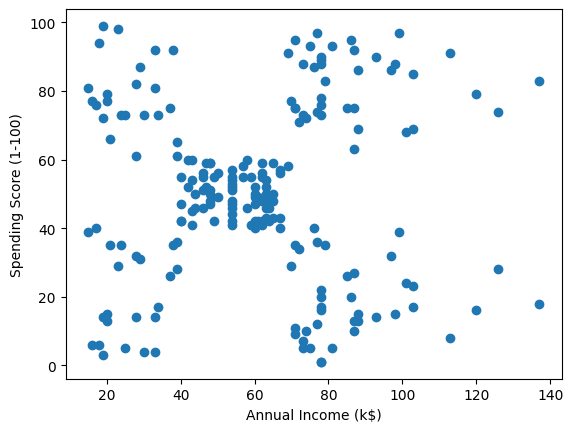

In [ ]:
# svisualising raw data

# import matplotlib.pyplot as plt

# plt.figure()
# plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.show()

In [ ]:
# from sklearn.cluster import KMeans
# k means clustering

# k means tries to group points so that points in the
# same group are close to each other

# kmeans = KMeans(n_clusters=5, random_state = 42)
# labels = kmeans.fit_predict(x)

# n_clusters , divide the customer into 5 groups
# fit (x) - looks at all data points in x , place
# 5 random centroids

# assigns each point to center of assigned points in Iteration
# repeats until stable
# for each data point returns which cluster it belongs to represents them with numerical values

In [ ]:
# labels[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [ ]:
# df["cluster"] = labels
# df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


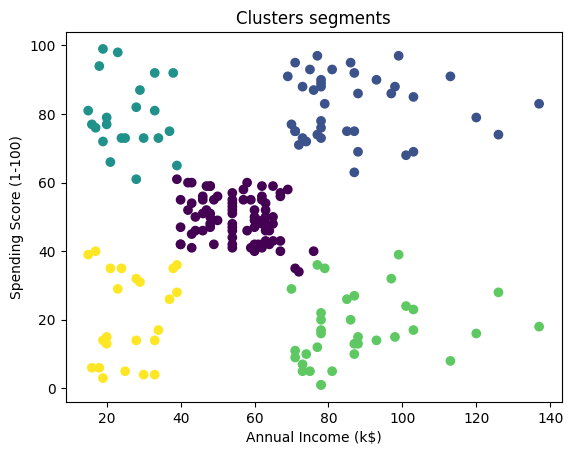

In [ ]:
# visualize clusters

# plt.scatter(
#     x['Annual Income (k$)'],
#     x['Spending Score (1-100)'],
#     c=labels
#     )
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.title('Clusters segments')
# plt.show()

In [ ]:
from sklearn import cluster
# elbow method

# it helps to find how many groups to use

from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters =  k, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

    # wcss - Within Cluster Sum of Squares
    # Lower wcss - tightly clusters
    # higher wcss - messy cluster

    # we will store this for each kmeans
    # each loop -new model - different number of cluster

    # in each loop k increases , wcss decreases and improvement
    # slows down after certain point

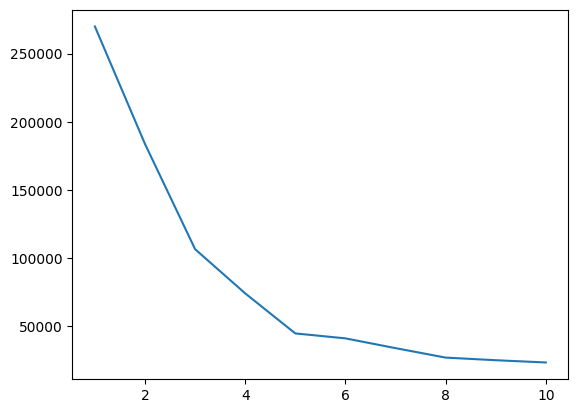

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters =5, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

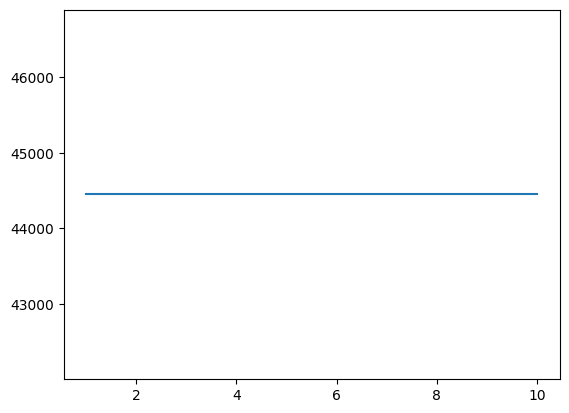

In [ ]:
plt.plot(range(1,11),wcss)

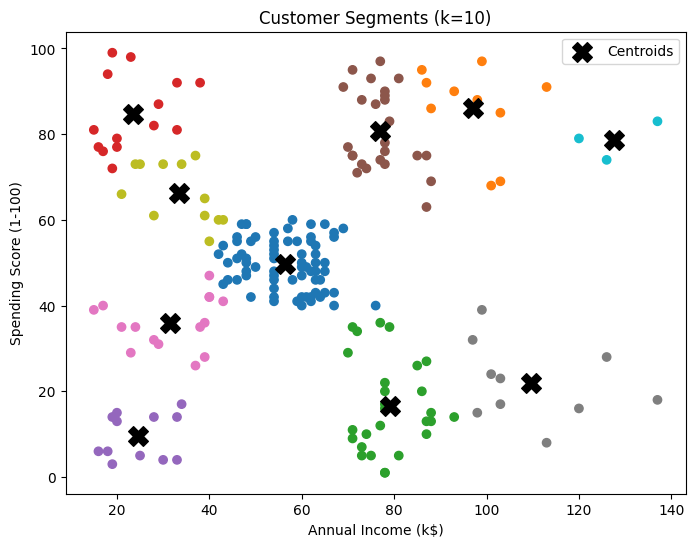

In [ ]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Run KMeans with k = 10
# kmeans = KMeans(n_clusters=10, random_state=42)
# labels = kmeans.fit_predict(x)

# # Visualize clusters
# plt.figure(figsize=(8,6))
# plt.scatter(
#     x['Annual Income (k$)'],
#     x['Spending Score (1-100)'],
#     c=labels, cmap='tab10'
# )
# plt.scatter(
#     kmeans.cluster_centers_[:,0],
#     kmeans.cluster_centers_[:,1],
#     s=200, c='black', marker='X', label='Centroids'
# )
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.title('Customer Segments (k=10)')
# plt.legend()
# plt.show()

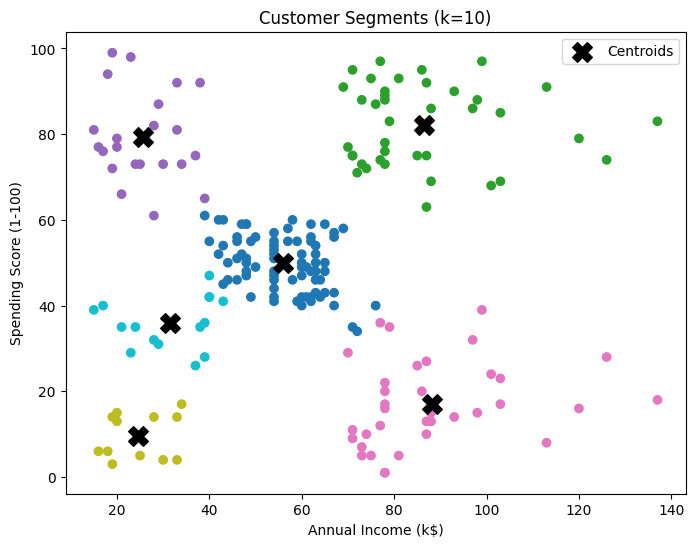

In [ ]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Run KMeans with k = 6
# kmeans = KMeans(n_clusters=6, random_state=42)
# labels = kmeans.fit_predict(x)

# # Visualize clusters
# plt.figure(figsize=(8,6))
# plt.scatter(
#     x['Annual Income (k$)'],
#     x['Spending Score (1-100)'],
#     c=labels, cmap='tab10'
# )
# plt.scatter(
#     kmeans.cluster_centers_[:,0],
#     kmeans.cluster_centers_[:,1],
#     s=200, c='black', marker='X', label='Centroids'
# )
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.title('Customer Segments (k=10)')
# plt.legend()
# plt.show()

In [ ]:
# applying PCA here

# Principal compound Analysis - PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# components = 2 - reducing data 2 dimensions,
# information preserved mostly

# PCA are used when data has many feature ,
# so pca compress information then we visualize it
# pca does not create clusters, it helps us see them

In [ ]:
import pandas as pd

# Rename columns for consistency with the user's query
df.rename(columns={
    'Annual Income (k$)': 'annual_income_k$',
    'Spending Score (1-100)': 'spending_score_1_100'
}, inplace=True)

# Perform the groupby operation
result = df.groupby('cluster')[['annual_income_k$','spending_score_1_100']].mean()
print(result)

         annual_income_k$  spending_score_1_100
cluster                                        
0               55.296296             49.518519
1               86.538462             82.128205
2               25.727273             79.363636
3               88.200000             17.114286
4               26.304348             20.913043


In [ ]:
df.groupby('cluster')[['annual_income_k$','spending_score_1_100']].mean()


,annual_income_k$,spending_score_1_100
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [ ]:
df['segment'] = df['cluster'].map({
    0: 'mid income - mid spender',
    1: 'high income - low spender',
    2: 'low income - high spender',
    3: 'high income - low spender',
    4: 'low income - low spender',
})

In [ ]:
df.head()

,CustomerID,Gender,Age,annual_income_k$,spending_score_1_100,cluster,segment
0,1,Male,19,15,39,4,low income - low spender
1,2,Male,21,15,81,2,low income - high spender
2,3,Female,20,16,6,4,low income - low spender
3,4,Female,23,16,77,2,low income - high spender
4,5,Female,31,17,40,4,low income - low spender


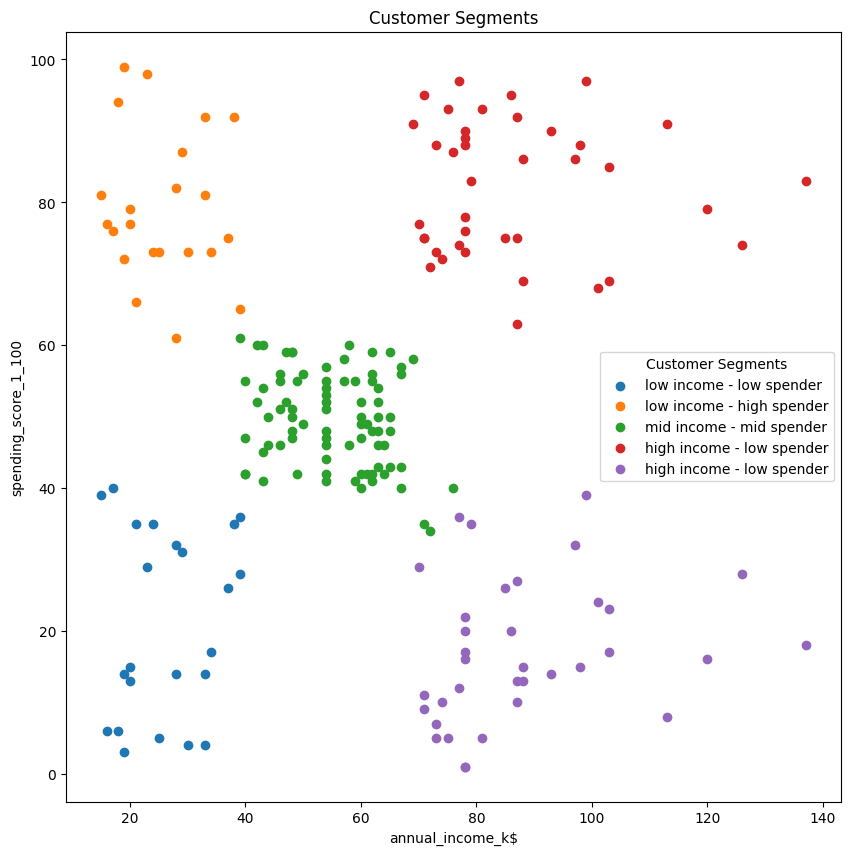

In [ ]:
plt.figure(figsize=(10,10))

for segment_name,cluster_id in df[['segment','cluster']].drop_duplicates().values:
  subset = df[df['cluster']== cluster_id]

  plt.scatter(
      subset['annual_income_k$'],
      subset['spending_score_1_100'],
      label = segment_name
)

plt.xlabel('annual_income_k$')
plt.ylabel('spending_score_1_100')
plt.title('Customer Segments')
plt.legend(title ='Customer Segments')
plt.show()

In [ ]:
# more aprroved or rejected?
# bar chart of loan status
# box plot for loan amount
# which group has higher loan approval
# which feature looks important for loan approval